In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy as sp
import matplotlib.patches as mpatches
from drift.core import manager
from scipy.sparse import lil_matrix
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
from log_red_cal_new import Visibilities_grid, A_matrix, colour_scatterplot, Bls_counts, Scatterplot


In [2]:

ts_2=h5py.File('/media/zahra/DATA/example_7by7_lmax_mmax_250/draco_synthesis_nofluc/maps/tstream_2.h5','r')
ag_2=h5py.File('/media/zahra/DATA/example_7by7_lmax_mmax_250/draco_synthesis_nofluc/rand_gains/amp_phase/app_gain_2.h5','r')
rg_2=h5py.File('/media/zahra/DATA/example_7by7_lmax_mmax_250/draco_synthesis_nofluc/rand_gains/sig_2.h5','r')

gn_2=h5py.File('/media/zahra/DATA/example_7by7_lmax_mmax_250/draco_synthesis_nofluc/rand_gains/ts_final/app_gain_noise_2.h5','r')


In [3]:
time_channel=400
after_gain=ag_2
rand_gain=rg_2
Ndish=49
avg_reals=30

m = manager.ProductManager.from_config('/media/zahra/DATA/example_7by7_lmax_mmax_250/prod_params_custom.yaml')

t=m.telescope
meas_vis, meas_vis_no_noise, meas_vis_gnoise, true_vis, N_comp, x_rec_real, x_rec_real_no_noise, x_true_real, x_rec_real_gnoise, x_rec_imag, x_rec_imag_no_noise, x_true_imag, x_rec_imag_gnoise, error_gnoise, error_gnoise_imag, error, error_imag, sigma_gn=Visibilities_grid(m,ts_2,rand_gain,after_gain,gn_2,time_channel, 50, 1)


print (A_matrix(m)[0].shape,'A')
print Bls_counts(m), 'Bls counts'


Product directory: /media/zahra/DATA/example_7by7_lmax_mmax_250/bt_matrices
(0.012207031977595827, 'sigma_gn')
((1176, 133), 'A')
(array([[ 0.,  1.],
       [ 1.,  2.],
       [ 2.,  3.],
       ...,
       [13., 42.],
       [ 6., 42.],
       [ 0., 48.]]), array([  42,   84,  120,  156,  191,  226,  256,  286,  316,  346,  374,
        402,  427,  452,  476,  500,  524,  548,  569,  590,  610,  630,
        650,  670,  688,  706,  724,  742,  758,  774,  789,  804,  819,
        834,  848,  862,  874,  886,  898,  910,  922,  934,  946,  958,
        968,  978,  988,  998, 1007, 1016, 1024, 1032, 1040, 1048, 1055,
       1062, 1068, 1074, 1080, 1086, 1092, 1098, 1104, 1110, 1115, 1120,
       1125, 1130, 1134, 1138, 1142, 1146, 1150, 1154, 1157, 1160, 1163,
       1166, 1168, 1170, 1172, 1174, 1175, 1176]), array([42, 42, 36, 36, 35, 35, 30, 30, 30, 30, 28, 28, 25, 25, 24, 24, 24,
       24, 21, 21, 20, 20, 20, 20, 18, 18, 18, 18, 16, 16, 15, 15, 15, 15,
       14, 14, 12, 12, 12, 12

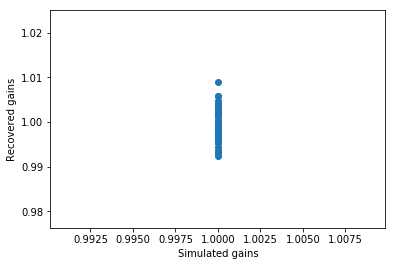

In [4]:
fig, ax = plt.subplots()
ax.scatter(1+x_true_real[:Ndish,time_channel],1+x_rec_real_gnoise[:Ndish,time_channel])
#ax.plot(lims, lims,'g')
#plt.errorbar(x_true_real[:Ndish,time_channel],x_rec_real[:Ndish,time_channel],xerr=None,yerr=error[:Ndish],linestyle="None")
plt.xlabel('Simulated gains')
plt.ylabel('Recovered gains')
lim=.002
#plt.ylim(-lim,lim)
#plt.xlim(-lim,lim)
plt.show()

49


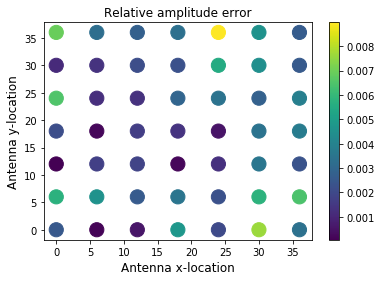

In [8]:
print error_gnoise.size

rel_err=np.abs(x_rec_real_gnoise[:Ndish,time_channel]-x_true_real[:Ndish,time_channel])/(1+x_true_real[:Ndish,time_channel])

colour_scatterplot(m, rel_err)

colour_scatterplot(m, error_gnoise) #THIS GIVES THE NICE SCATTER PLOT
